In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt

In [ ]:
from logging import RootLogger
# Mount Google Drive
from google.colab import drive # import drive from google colab

root = "/content/drive"     # default location for the drive

drive.mount(root)           # we mount the google drive at /content/drive

# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
my_google_drive_path = "MyDrive/StudentProject2023"

project_path = join(root, my_google_drive_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading DuZu10 data as binding_energy
dz_data = pd.read_csv(join(project_path,"processed_data/dz_data.csv"), sep=";")


#These two lines are there because column names were strange
#In the dz_data.csv file, maybe change before so we don't have to do this
dz_data = dz_data.drop(dz_data.columns[4:12], axis=1)
dz_data.columns = ["Z","N","dz_BE/A","dz_ME"]

In [ ]:
#We create a new column in pandas dataframe "dz_data" containing mass number
dz_data['A'] = dz_data['Z'] + dz_data['N']

#We create a new column containing Binding Energy not divided by A
dz_data['dz_BE'] = dz_data['dz_BE/A'] * dz_data['A']
dz_data.sort_values(by='A', ascending=True)


### Calcul de S1n et S1p

In [ ]:
dz_data.sort_values(by=['Z'], ascending=True)
dz_data['dz_S1n'] = dz_data['dz_BE'] - dz_data['dz_BE'].shift(1)

In [ ]:
dz_data = dz_data.sort_values(by=['N','A'], ascending=True)

In [ ]:
dz_data['dz_S1p'] = dz_data['dz_BE'] - dz_data['dz_BE'].shift(1)

### Calcul de S2n et S2p

In [ ]:
#mass.sort_values(by='N', ascending=True)
dz_data['dz_S2p'] = dz_data['dz_BE'] - dz_data['dz_BE'].shift(2)


In [ ]:
dz_data = dz_data.sort_values(by=['Z','A'], ascending=True)
dz_data['dz_S2n'] = dz_data['dz_BE'] - dz_data['dz_BE'].shift(2)

### Plots

In [ ]:
#We don't use data before A<16 because these light nuclei experience
#Physics effects that are very far from trivial (halo etc)
dz_data.drop(dz_data[(dz_data["A"]<16 )].index, inplace=True)

#We drop all data in DZ10 model that have a negative binding energy 
#Because a negative binding energy mean no atom
dz_data.drop(dz_data[(dz_data["dz_BE"]<0 )].index, inplace=True)

#These next lines would be to create drip lines predicted by DZ10
#dz_data.drop(dz_data[(dz_data["dz_S2n"]<0 )].index, inplace=True)
#dz_data.drop(dz_data[(dz_data["dz_S2p"]<0 )].index, inplace=True)
#dz_data.drop(dz_data[(dz_data["dz_S1p"]<0 )].index, inplace=True)
#dz_data.drop(dz_data[(dz_data["dz_S1n"]<0 )].index, inplace=True)



In [ ]:
dz_data=dz_data.sort_values(by='A', ascending=True)

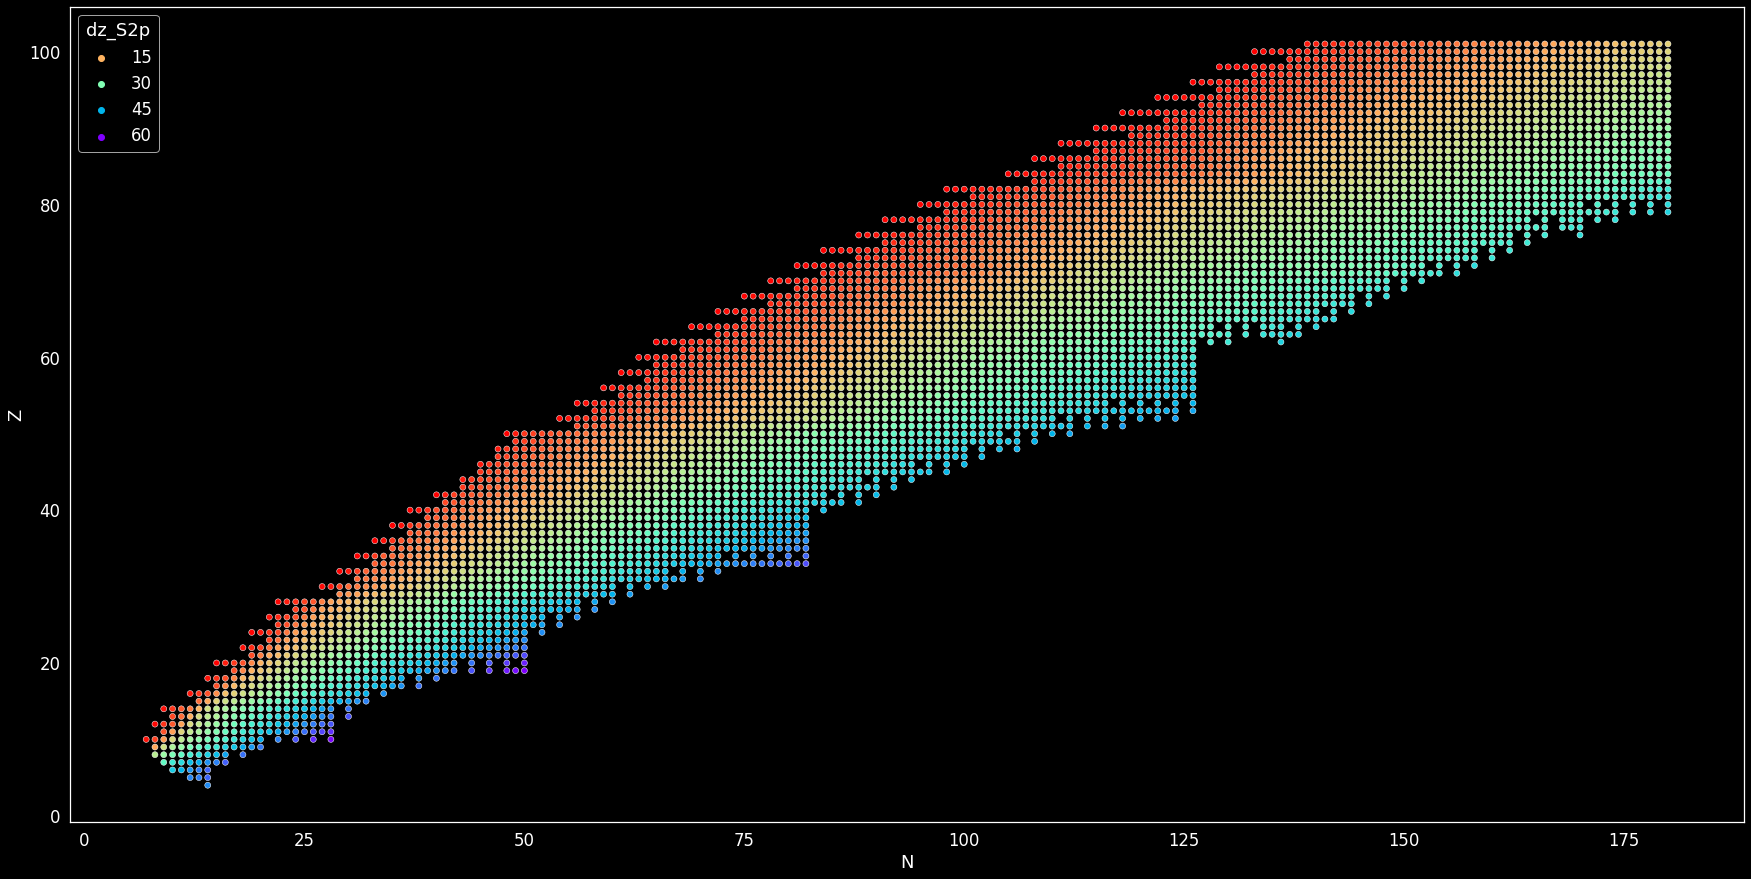

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize =(30,15))
    plt.autoscale()
    plt.grid()
    sns.scatterplot(x='N', y='Z', hue='dz_S2p', data=dz_data, palette="rainbow_r")

In [ ]:
ame_data = pd.read_csv(join(project_path,"mass_data.csv"), sep=";")
ame_data.columns = ["N-Z","N","Z","A","ame_ME","ame_ME_unc","ame_BE/A","ame_BE/A_unc","ame_BDE","ame_BDE_unc","ame_AM","ame_AM_unc"]

ame_data['ame_BE'] = ame_data['ame_BE/A'] * ame_data['A']
ame_data.sort_values(by='A', ascending=True)

ame_data.sort_values(by=['Z'], ascending=True)

ame_data['ame_S2p'] = ame_data['ame_BE'] - ame_data['ame_BE'].shift(2)

ame_data = ame_data.sort_values(by=['Z','A'], ascending=True)
ame_data['ame_S2n'] = ame_data['ame_BE'] - ame_data['ame_BE'].shift(2)

ame_data.head()


,N-Z,N,Z,A,ame_ME,ame_ME_unc,ame_BE/A,ame_BE/A_unc,ame_BDE,ame_BDE_unc,ame_AM,ame_AM_unc,ame_BE,ame_S2p,ame_S2n
0,1,1,0,1,8071.318060,0.000440,0.0000,0.0000,782.34700,0.00040,1.008665,0.000470,0.0000,NaN,NaN
1,-1,0,1,1,7288.971064,0.000013,0.0000,0.0000,0.00000,0.00000,1.007825,0.000014,0.0000,NaN,NaN
2,0,1,1,2,13135.722895,0.000015,1112.2831,0.0002,0.00000,0.00000,2.014102,0.000015,2224.5662,2224.56620,2224.5662
3,1,2,1,3,14949.810900,0.000080,2827.2654,0.0003,18.59202,0.00006,3.016049,0.000080,8481.7962,8481.79620,8481.7962
6,2,3,1,4,24621.129000,100.000000,1720.4491,25.0000,22196.21310,100.00000,4.026432,107.354000,6881.7964,-836.24492,4657.2302


In [ ]:
#We will merge the two table only considering existing elements 
merged_data=pd.merge(dz_data, ame_data, on=["Z", "N", "A"])

In [ ]:
merged_data.head()

,Z,N,dz_BE/A,dz_ME,A,dz_BE,dz_S1n,dz_S1p,dz_S2p,dz_S2n,...,ame_ME_unc,ame_BE/A,ame_BE/A_unc,ame_BDE,ame_BDE_unc,ame_AM,ame_AM_unc,ame_BE,ame_S2p,ame_S2n
0,6,10,6.898167,14.077316,16,110.370667,4.507875,23.188839,42.117482,5.902274,...,3.5780,6922.0546,0.2236,8010.2260,4.2540,16.014701,3.84000,110752.8736,42188.3120,5468.3964
1,8,8,7.993990,-5.020561,16,127.903839,16.131404,12.683879,23.435447,29.960029,...,0.0003,7976.2072,0.0002,-15412.1840,5.3642,15.994915,0.00032,127619.3152,16866.4416,28887.4190
2,7,9,7.419595,4.952110,16,118.713516,3.493556,12.850725,33.437960,13.427935,...,2.3010,7373.7971,0.1438,10420.9094,2.3014,16.006102,2.47000,117980.7536,29863.0976,13322.1464
3,9,8,7.587443,1.185776,17,128.986529,17.576861,1.082690,13.766569,33.561636,...,0.2480,7542.3284,0.0146,-14548.7507,0.4323,17.002095,0.26600,128219.5828,4353.6830,30757.6873
4,5,12,5.179702,45.246765,17,88.054931,1.097350,21.801620,49.412617,0.873103,...,204.1040,5269.6677,12.0061,22684.4422,204.8410,17.046931,219.11400,89584.3509,-21840.4331,1383.6939


In [ ]:
#Change of units
#In original file ???
merged_data["ame_BE/A"] = merged_data["ame_BE/A"]/1000
merged_data["ame_ME"] = merged_data["ame_ME"]/1000
merged_data["ame_BE"] = merged_data["ame_BE"]/1000
merged_data["ame_S2p"] = merged_data["ame_S2p"]/1000
merged_data["ame_S2n"] = merged_data["ame_S2n"]/1000
merged_data["BE_diff_dz_ame"] = merged_data["ame_BE/A"]*merged_data["A"] - merged_data["dz_BE"]


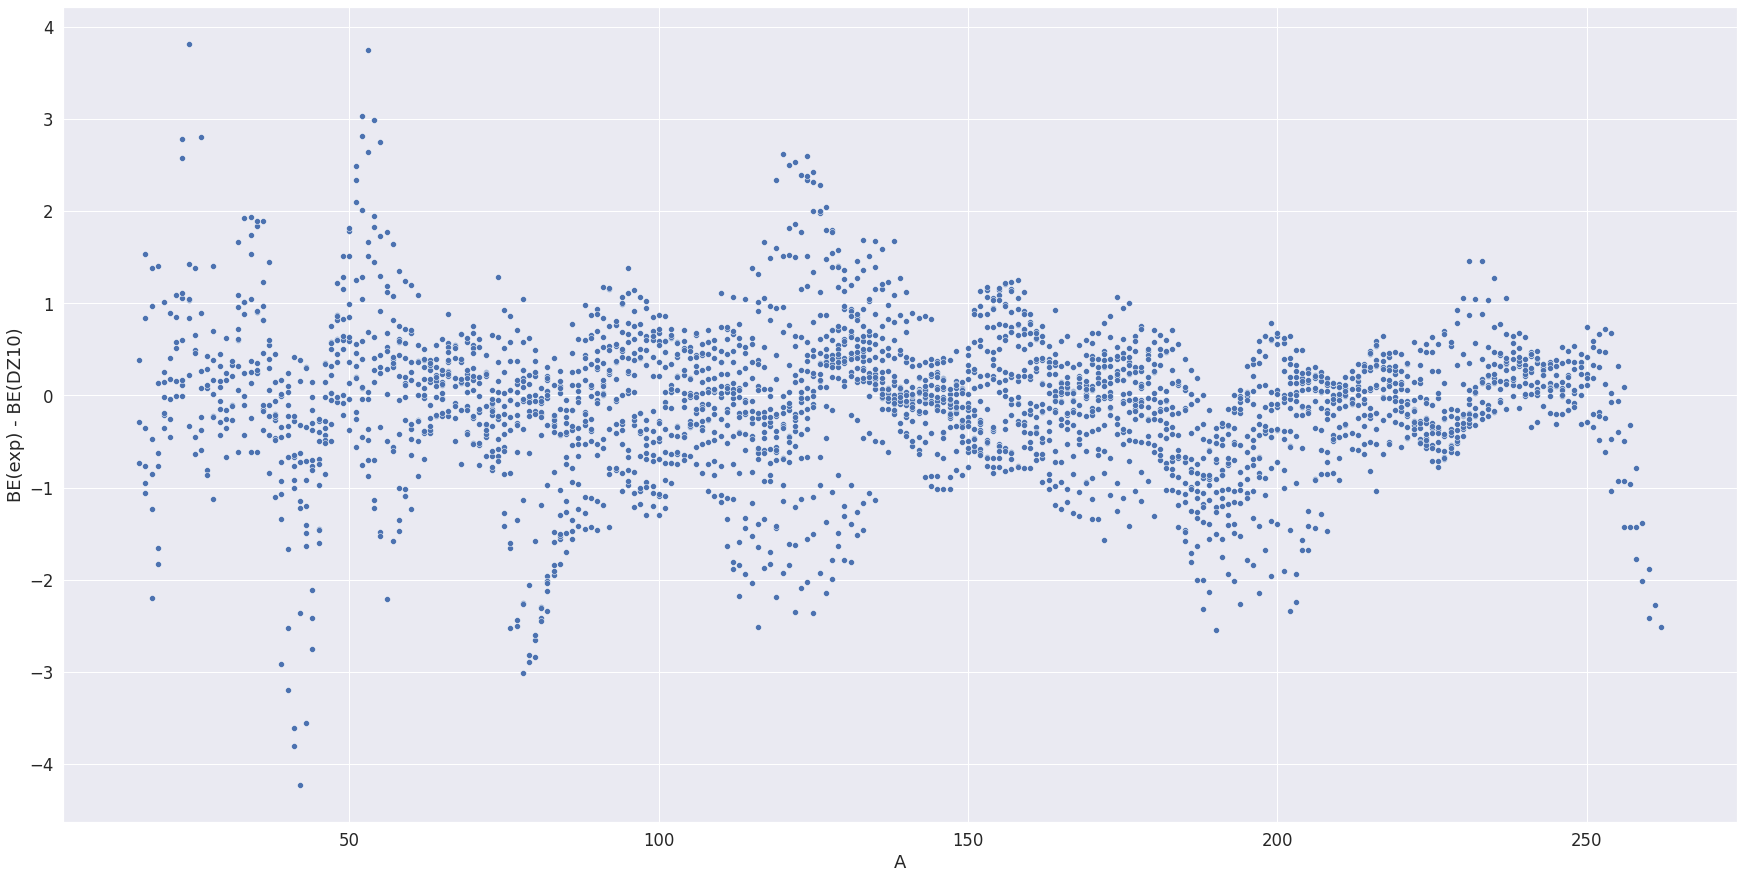

In [ ]:

plt.figure(figsize =(30,15))
#plt.yscale('log')
plt.ylabel("BE(exp) - BE(DZ10)")
sns.scatterplot( x="A",y="BE_diff_dz_ame", data=merged_data, palette="rainbow_r")

In [ ]:
merged_data=merged_data.drop(["N-Z","ame_ME_unc","ame_BE/A_unc","ame_BDE","ame_BDE_unc","ame_AM_unc"], axis=1)


In [ ]:
rms_DZ10 = np.sqrt(((merged_data["BE_diff_dz_ame"] ** 2).sum()) / len(merged_data["BE_diff_dz_ame"]))

print('RMS for DZ10:', rms_DZ10)


RMS for DZ10: 0.7662977173777992


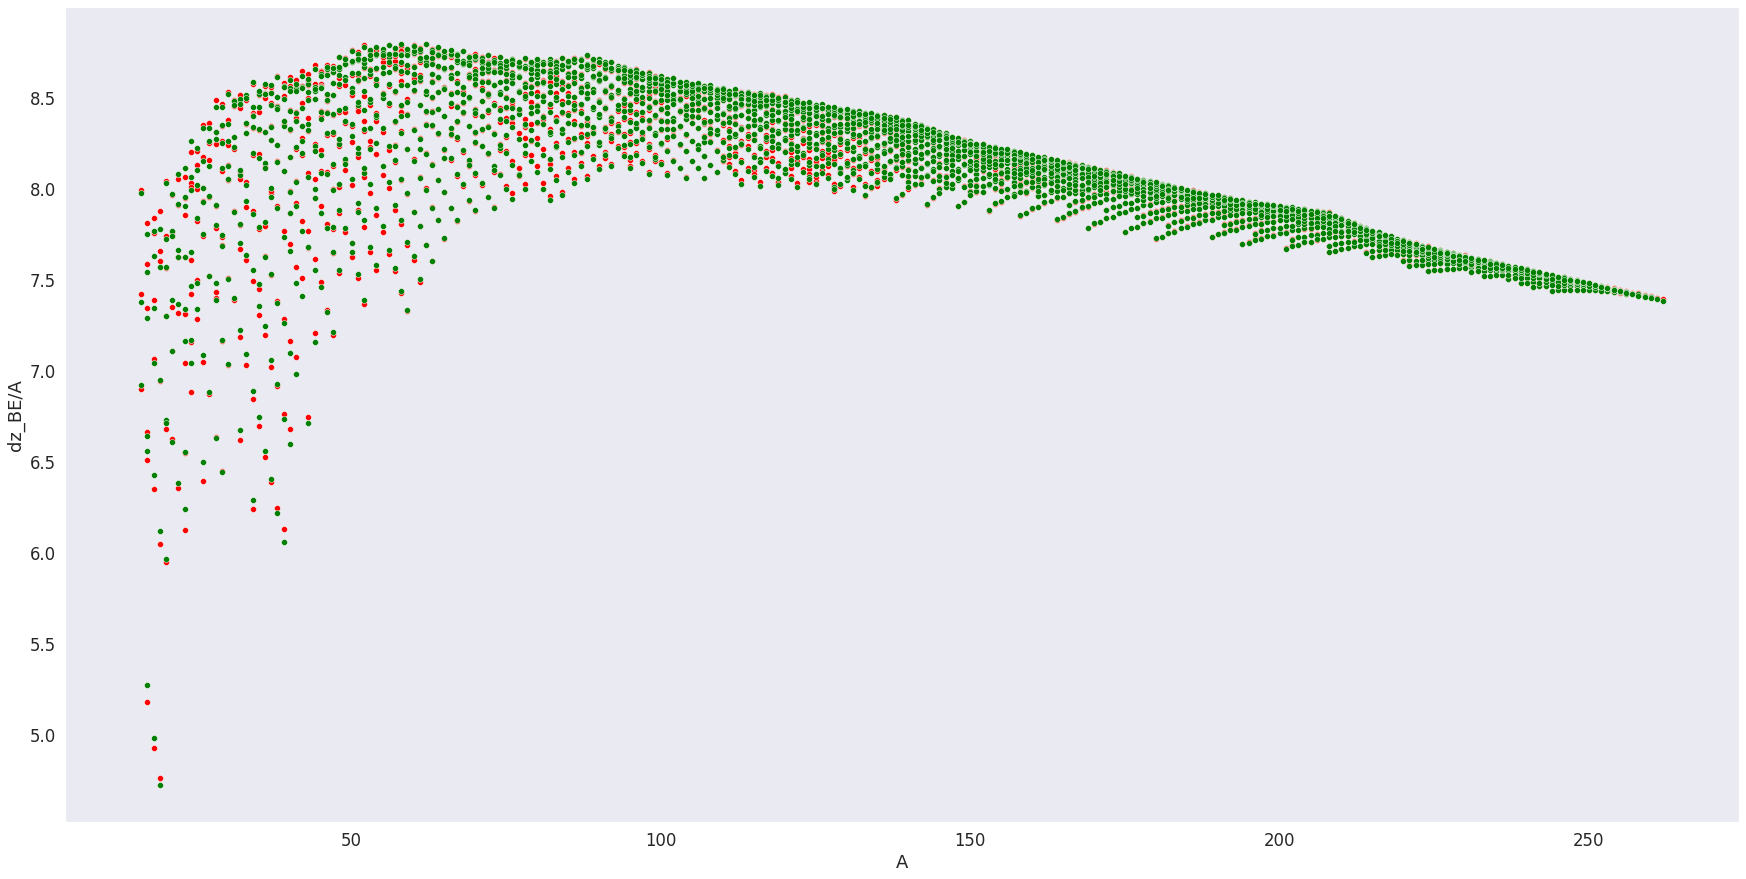

In [ ]:
plt.figure(figsize =(30,15))
#plt.autoscale()
plt.grid()
sns.scatterplot(x="A", y="dz_BE/A", data=merged_data, palette="deep", color="red")
sns.scatterplot(x="A", y="ame_BE/A", data=merged_data, palette="deep",  color="green")

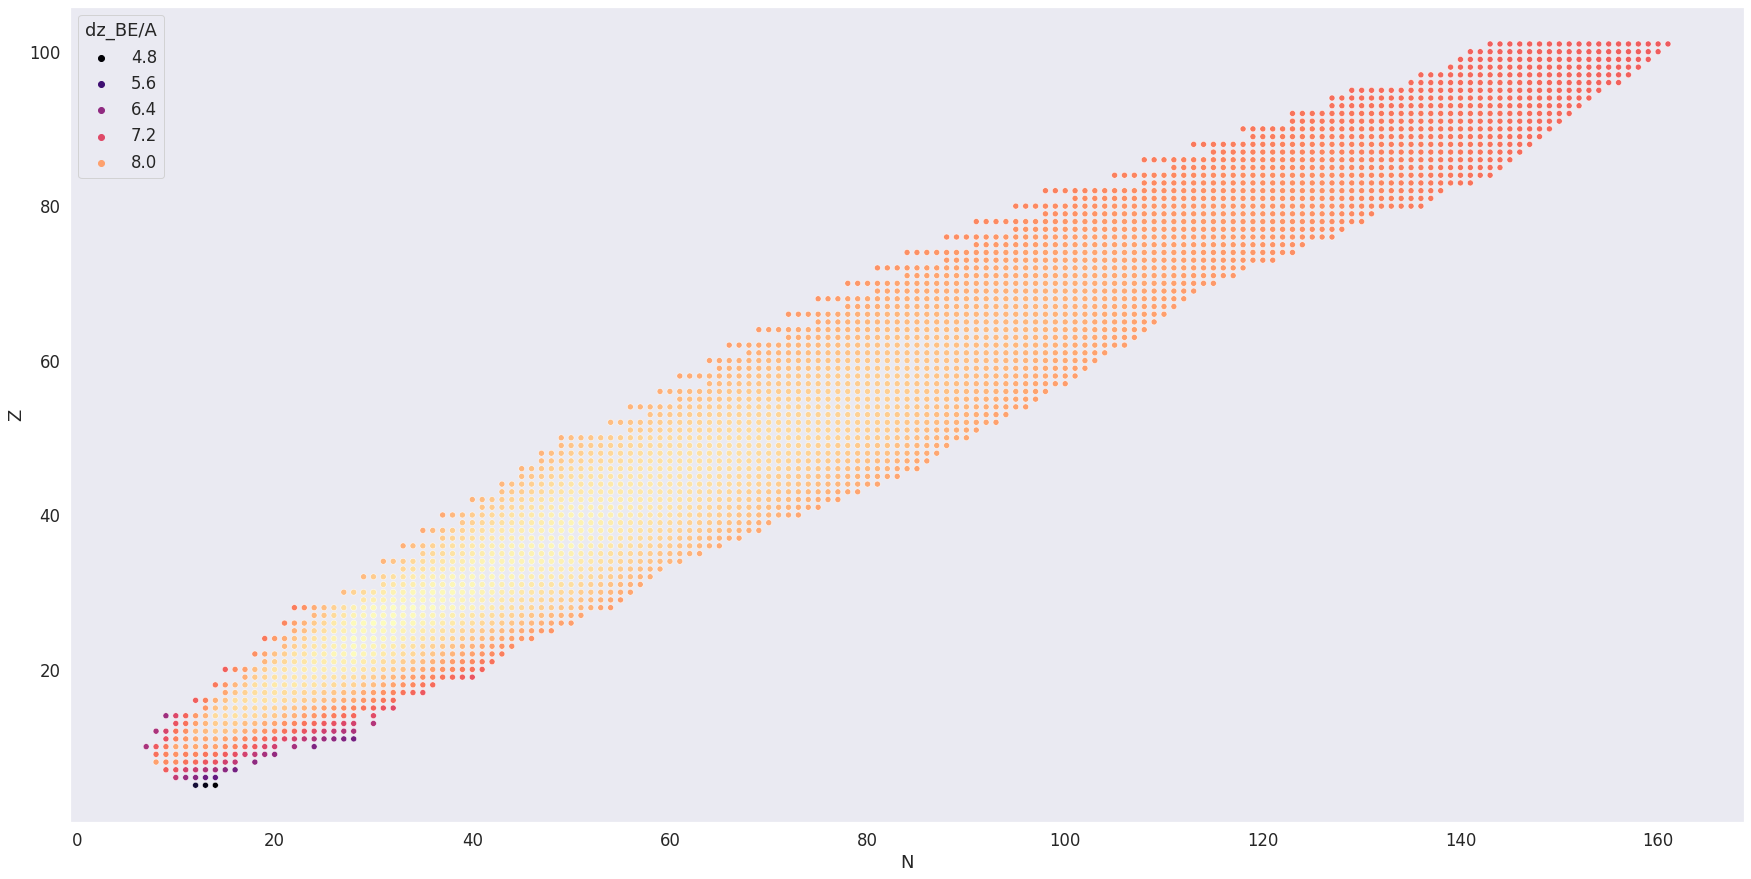

In [ ]:

plt.figure(figsize =(30,15))
#plt.autoscale()
plt.grid()
sns.scatterplot(x="N", y="Z", hue="dz_BE/A",data=merged_data, palette="magma")

In [ ]:
merged_data.to_csv(join(project_path,"merged_data.csv"),sep=";", index=False)

In [ ]:

#From the merged table, create one training dataset and a validation one
train_data = pd.DataFrame(columns=["Z","N","dz_BE/A","dz_ME","A","dz_BE","dz_S1n","dz_S1p","dz_S2p", "dz_S2n","ame_ME", "ame_BE/A", "ame_AM", "ame_BE", "ame_S2p", "ame_S2n", "BE_diff_dz_ame"])
validation_data = pd.DataFrame(columns=["Z","N","dz_BE/A","dz_ME","A","dz_BE","dz_S1n","dz_S1p","dz_S2p", "dz_S2n","ame_ME", "ame_BE/A", "ame_AM", "ame_BE", "ame_S2p", "ame_S2n", "BE_diff_dz_ame"])


for i in range(len(merged_data)) :
    
    if int(merged_data.iloc[i]["Z"]) in [10,38,54,68,82] :
        validation_data=validation_data.append(merged_data.iloc[i], ignore_index=True)

    else :
        train_data=train_data.append(merged_data.iloc[i], ignore_index=True)


train_merged_csv=train_data.to_csv(join(project_path,"train_merged_data.csv"),sep=";")
validation_merged_csv=validation_data.to_csv(join(project_path,"validation_merged_data.csv"),sep=";")